In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [3]:
#importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Data collection and Preprocessing
# Loading CSV data to a pandas data frame
heart_data = pd.read_csv(r"C:\Users\HP\Downloads\heart (1).csv")

In [5]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
heart_data.shape

(303, 14)

In [8]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# checking distribution of target variable
heart_data["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

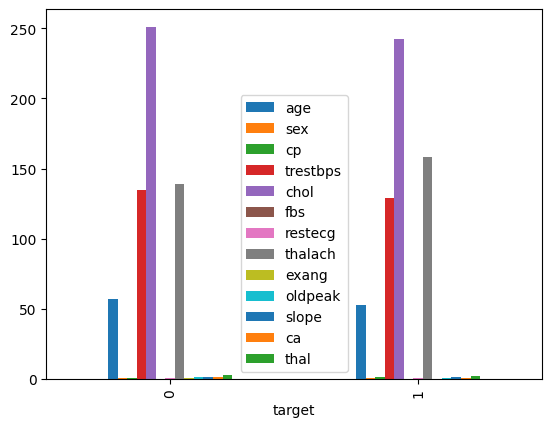

In [10]:
heart_data.groupby("target").mean().plot(kind='bar')

In [11]:
# splitting the feature and traget
X = heart_data.drop('target' , axis = 1)
Y = heart_data["target"]


In [12]:
print(X)
print(Y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [13]:
# Train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X , Y , test_size = 0.2 , stratify = Y , random_state = 2)

In [14]:
print(X.shape , X_train.shape , X_test.shape)

(303, 13) (242, 13) (61, 13)


In [29]:
# Compairing the performance of the model
# lists of the model
models = [LogisticRegression(max_iter=1000) , SVC(kernel='linear') , KNeighborsClassifier() , RandomForestClassifier()] 

In [30]:
def compare_models_train_test():
    
    for model in models:

        # training the model
        model.fit(X_train , Y_train)

        #evaluating the model
        test_data_prediction = model.predict(X_test)
        
        accuracy = accuracy_score(Y_test , test_data_prediction)
        
        print("Accuracy score of the model" , model," = " , accuracy)

In [31]:
compare_models_train_test()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score of the model LogisticRegression(max_iter=1000)  =  0.8032786885245902
Accuracy score of the model SVC(kernel='linear')  =  0.819672131147541
Accuracy score of the model KNeighborsClassifier()  =  0.6229508196721312
Accuracy score of the model RandomForestClassifier()  =  0.8032786885245902


In [18]:
# Cross validation

In [32]:
cv_score_lr = cross_val_score(LogisticRegression(max_iter=1000) , X , Y ,cv=5)

print(cv_score_lr)

mean_accuracy_lr = sum (cv_score_lr ) / len(cv_score_lr)

mean_accuracy_lr = round(mean_accuracy_lr , 2)

print(mean_accuracy_lr)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
0.83


In [ ]:
# Creating a function to compaire the models

In [34]:
models = [LogisticRegression(max_iter=1000) , SVC(kernel = "linear") , KNeighborsClassifier() , RandomForestClassifier()]

In [35]:
def compaire_model_cross_validation():

    for model in models:

        cv_score = cross_val_score(model , X , Y , cv=5)
        mean_accuracy = sum(cv_score) / len (cv_score)
        mean_accuracy = mean_accuracy * 100 
        mean_accuracy = round(mean_accuracy , 2)
        print("cross_validation_accuracies for " , model , "=" , cv_score)
        print("Accuracy % of the", "model" , mean_accuracy)
        print("-----------------------------------------------------------")

In [36]:
compaire_model_cross_validation()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


cross_validation_accuracies for  LogisticRegression(max_iter=1000) = [0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
Accuracy % of the model 82.83
-----------------------------------------------------------
cross_validation_accuracies for  SVC(kernel='linear') = [0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
Accuracy % of the model 82.83
-----------------------------------------------------------
cross_validation_accuracies for  KNeighborsClassifier() = [0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
Accuracy % of the model 64.39
-----------------------------------------------------------
cross_validation_accuracies for  RandomForestClassifier() = [0.81967213 0.8852459  0.81967213 0.76666667 0.76666667]
Accuracy % of the model 81.16
-----------------------------------------------------------
